In [6]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [86]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    
    ## 1. UNDISTORT 
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    ## 2. Convert to Gray Scale
    imgGray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

    ## 3. Find corners
    ret, corners = cv2.findChessboardCorners(imgGray, (nx, ny))
    print(' ret    : ', ret)
    print(' Corners: ', corners.shape)
    print(corners)

    ## 4a. if corners found Draw corners 
    cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)        
    ## 4b. define 4 source pointsl
    
    src = np.float32([corners[0,0], corners[7,0], corners[40,0], corners[47,0]])
    dst = np.float32([[100,100],[1200,100],[100,900],[1200,900]])
    print('src: ', corners[18], corners[23], corners[34], corners[39])
    print('dst: ', dst)
    print(src.shape, dst.shape)
    ## 4c. define 4 destination points
    
    ## 4d. get M tranform matrix     
    M = cv2.getPerspectiveTransform(src, dst)
    print(' M:', M.shape)
    print(' img shape: ',undist.shape[1::-1])
        
    ## 4e. warp image to top-down view
    warped = cv2.warpPerspective(undist, M, undist.shape[1::-1], flags=cv2.INTER_LINEAR)
    return warped, M

In [87]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
print(' mtx.shape',mtx.shape, ' dist shape:', dist.shape)

# Read in an image
image = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

 mtx.shape (3, 3)  dist shape: (1, 5)


In [88]:
top_down, perspective_M = corners_unwarp(image, nx, ny, mtx, dist)

 ret    :  True
 Corners:  (48, 1, 2)
[[[ 436.50708   114.335556]]

 [[ 573.60016   137.86545 ]]

 [[ 691.3621    156.4137  ]]

 [[ 793.9415    174.45566 ]]

 [[ 884.1121    190.4149  ]]

 [[ 966.1258    203.40602 ]]

 [[1037.9983    215.59805 ]]

 [[1103.9984    224.66327 ]]

 [[ 441.40646   256.57117 ]]

 [[ 575.6067    268.5169  ]]

 [[ 691.44507   279.54266 ]]

 [[ 792.4461    289.64633 ]]

 [[ 881.6209    297.7213  ]]

 [[ 962.3346    304.2809  ]]

 [[1033.0236    311.5912  ]]

 [[1098.5       317.5     ]]

 [[ 447.05347   393.79935 ]]

 [[ 577.4161    395.537   ]]

 [[ 692.3993    397.60666 ]]

 [[ 791.0025    400.09674 ]]

 [[ 878.70465   401.76456 ]]

 [[ 956.86456   403.5924  ]]

 [[1026.5544    405.12177 ]]

 [[1092.2971    407.17816 ]]

 [[ 453.26105   525.3415  ]]

 [[ 580.83453   518.74023 ]]

 [[ 692.3153    513.1387  ]]

 [[ 790.28894   507.55435 ]]

 [[ 875.6121    502.69116 ]]

 [[ 953.82733   499.39743 ]]

 [[1023.0828    495.01288 ]]

 [[1086.        493.5     ]]

 [

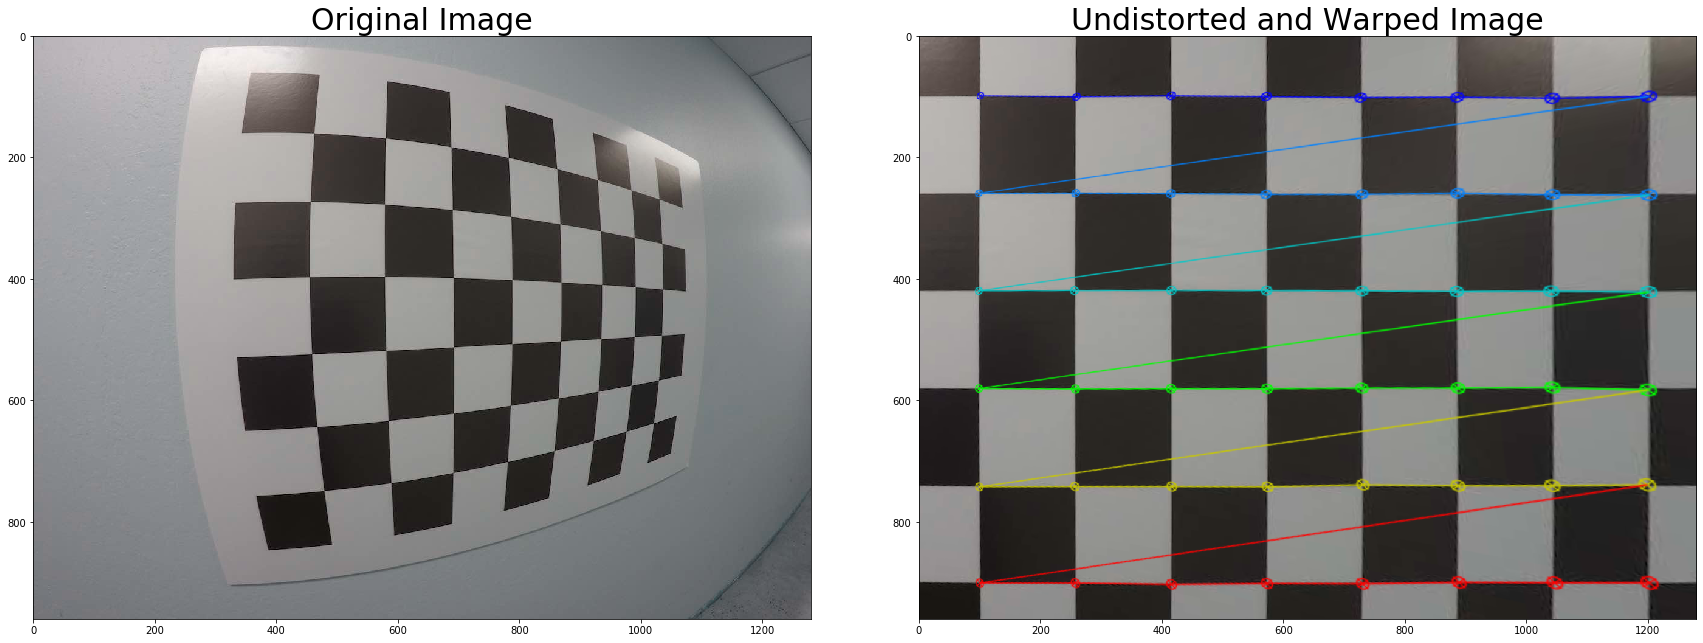

In [90]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)